In [1]:
import numpy as np
import pandas as pd
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns

In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importing Data

In [3]:
xo = pd.read_csv('tic-tac-toe.csv')
xo.head()

,top_left_square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


I have chosen this dataset as I am a beginner in Python so wanted to implement a fairly simplistic classification dataset to get me started. I am interested in gaming and how certain moves or strategies will influence the result. This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first. The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row").

The dataset was taken from the UCI Machine Learning Repository website : https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame

In [4]:
xo[xo.isnull().any(axis=1)] #check for null values

,top_left_square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class


In [5]:
xo.describe()

,top_left_square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


In [6]:
xo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   top_left_square       958 non-null    object
 1   top-middle-square     958 non-null    object
 2   top-right-square      958 non-null    object
 3   middle-left-square    958 non-null    object
 4   middle-middle-square  958 non-null    object
 5   middle-right-square   958 non-null    object
 6   bottom-left-square    958 non-null    object
 7   bottom-middle-square  958 non-null    object
 8   bottom-right-square   958 non-null    object
 9   Class                 958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


In [7]:
#https://datascience.stackexchange.com/questions/71804/how-to-perform-one-hot-encoding-on-multiple-categorical-columns

categorical_cols = ["top_left_square","top-middle-square","top-right-square","middle-left-square","middle-middle-square","middle-right-square","bottom-left-square","bottom-middle-square","bottom-right-square"]
xo_encoded = xo

for col in categorical_cols:
    col_ohe = pd.get_dummies(xo[col], prefix=col)
    xo_encoded = pd.concat((xo_encoded, col_ohe), axis=1).drop(col, axis=1)
    
xo_encoded = xo_encoded.drop(columns = ["Class"])


In [8]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers

class_cat = xo[["Class"]]

ordinal_encoder = OrdinalEncoder() 
class_encoded = ordinal_encoder.fit_transform(class_cat)

target = pd.DataFrame(data=class_encoded)

In [9]:
positive = (target == 1)

positive.info

<bound method DataFrame.info of          0
0     True
1     True
2     True
3     True
4     True
..     ...
953  False
954  False
955  False
956  False
957  False

[958 rows x 1 columns]>

# Data Visualisation

<AxesSubplot:>

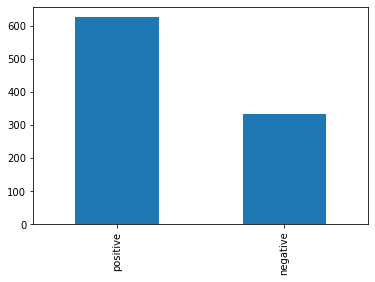

In [10]:
fig, ax = plt.subplots()
xo['Class'].value_counts().plot(ax=ax, kind='bar')

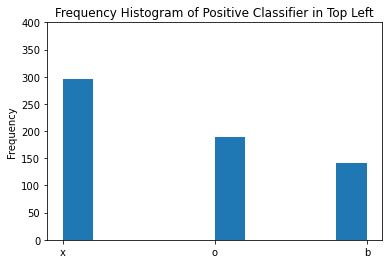

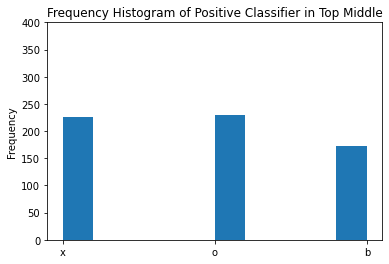

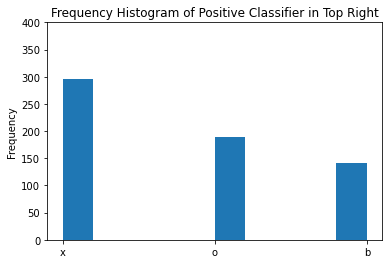

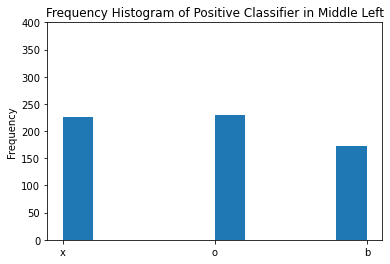

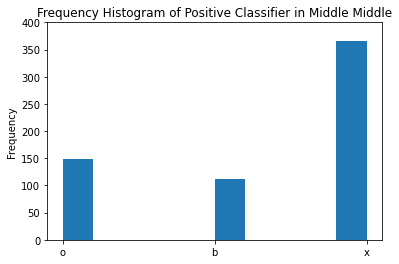

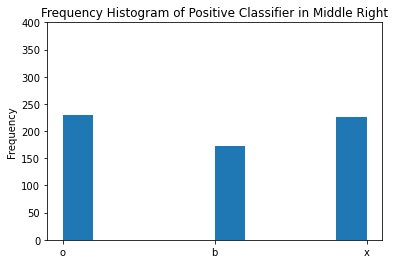

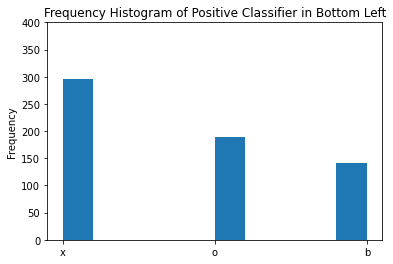

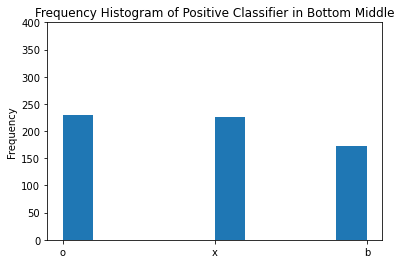

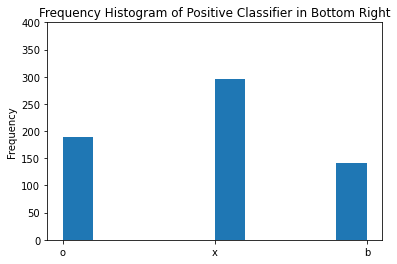

In [11]:
x1 = xo.loc[xo.Class=='positive', 'top_left_square']
x2 = xo.loc[xo.Class=='positive', 'top-middle-square']
x3 = xo.loc[xo.Class=='positive', 'top-right-square']
x4 = xo.loc[xo.Class=='positive', 'middle-left-square']
x5 = xo.loc[xo.Class=='positive', 'middle-middle-square']
x6 = xo.loc[xo.Class=='positive', 'middle-right-square']
x7 = xo.loc[xo.Class=='positive', 'bottom-left-square']
x8 = xo.loc[xo.Class=='positive', 'bottom-middle-square']
x9 = xo.loc[xo.Class=='positive', 'bottom-right-square']

plt.gca().set(title='Frequency Histogram of Positive Classifier in Top Left', ylabel='Frequency', ylim=(0,400))
plt.hist(x1)
plt.show()

plt.gca().set(title='Frequency Histogram of Positive Classifier in Top Middle', ylabel='Frequency', ylim=(0,400))
plt.hist(x2)
plt.show()

plt.gca().set(title='Frequency Histogram of Positive Classifier in Top Right', ylabel='Frequency', ylim=(0,400))
plt.hist(x3)
plt.show()

plt.gca().set(title='Frequency Histogram of Positive Classifier in Middle Left', ylabel='Frequency', ylim=(0,400))
plt.hist(x4)
plt.show()

plt.gca().set(title='Frequency Histogram of Positive Classifier in Middle Middle', ylabel='Frequency', ylim=(0,400))
plt.hist(x5)
plt.show()

plt.gca().set(title='Frequency Histogram of Positive Classifier in Middle Right', ylabel='Frequency', ylim=(0,400))
plt.hist(x6)
plt.show()

plt.gca().set(title='Frequency Histogram of Positive Classifier in Bottom Left', ylabel='Frequency', ylim=(0,400))
plt.hist(x7)
plt.show()

plt.gca().set(title='Frequency Histogram of Positive Classifier in Bottom Middle', ylabel='Frequency', ylim=(0,400))
plt.hist(x8)
plt.show()

plt.gca().set(title='Frequency Histogram of Positive Classifier in Bottom Right', ylabel='Frequency', ylim=(0,400))
plt.hist(x9)
plt.show()


<AxesSubplot:xlabel='Class', ylabel='count'>

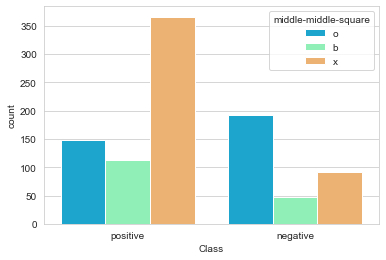

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Class',hue='middle-middle-square',data=xo,palette='rainbow')

In [13]:
corr = xo.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr["Class"] = corr["Class"].abs()
corr["Class"].sort_values(ascending=False)

Class                   1.000000
middle-middle-square    0.341749
bottom-right-square     0.112727
middle-right-square     0.090391
middle-left-square      0.084167
top-middle-square       0.084167
bottom-left-square      0.039097
top_left_square         0.039097
top-right-square        0.039097
bottom-middle-square    0.013396
Name: Class, dtype: float64

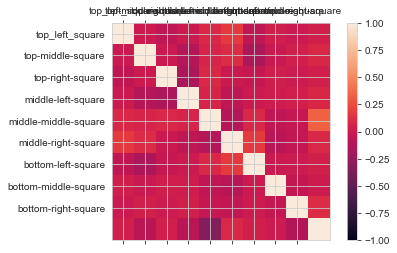

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(categorical_cols)
ax.set_yticklabels(categorical_cols)
plt.show()

The visualisations show that if there is a x in the middle of the board, then this will more than likely result in a positive outcome for player x

# Bayes Classifier

In [15]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(xo_encoded, positive.values.ravel()) 

#.values will give the values in an array. (shape: (n,1)
#.ravel will convert that array shape to (n, )

GaussianNB()

In [16]:
prob = clf.predict_proba(xo_encoded)[:,1] # This will give you positive class prediction probabilities  
pred = np.where(prob > 0.5, True, False) # This will threshold the probabilities to give class predictions.
clf.score(xo_encoded, pred)


1.0

In [17]:
print("Number of mislabeled points from %d points : %d"
      % (xo_encoded.shape[0],(positive.values.ravel()!= pred).sum()))

Number of mislabeled points from 958 points : 313


In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, xo_encoded, positive.values.ravel(), cv=3, scoring="accuracy")

array([0.653125  , 0.65517241, 0.65830721])

In [19]:
from sklearn import metrics

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(positive, pred)}\n")

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

       False       0.53      0.47      0.50       332
        True       0.74      0.78      0.76       626

    accuracy                           0.67       958
   macro avg       0.63      0.63      0.63       958
weighted avg       0.67      0.67      0.67       958




In [20]:
confusion_matrix=metrics.confusion_matrix(positive,pred)
confusion_matrix

array([[156, 176],
       [137, 489]], dtype=int64)

In [21]:
pd.crosstab(positive.values.ravel(), pred, rownames=['True'], colnames=['Predicted'], margins=True)

#https://stats.stackexchange.com/questions/95209/how-can-i-interpret-a-confusion-matrix

Predicted,False,True,All
True,,,
False,156,176,332
True,137,489,626
All,293,665,958


In [22]:
from sklearn.metrics import precision_score, recall_score

precision_score(positive, pred)

#It describes how good a model is at predicting the positive class.

0.7353383458646616

In [23]:
489 / (489 + 176)

0.7353383458646616

In [24]:
recall_score(positive, pred)

# True Positive Rate = True Positives / (True Positives + False Negatives)
# also referred to as sensitivity

0.7811501597444089

In [25]:
489 / (489 + 137)

0.7811501597444089

In [26]:
from sklearn.metrics import f1_score

f1_score(positive, pred)

#calculates the harmonic mean of the precision and recall

0.7575522850503487

In [27]:
489 / (489 + (137 + 176) / 2)

0.7575522850503486

In [28]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(positive, prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

# probability that randomly chosen positive instance is ranked above randomly chosen negative one
#https://stats.stackexchange.com/questions/263121/why-are-the-roc-curves-not-smooth

0.7625630316794334

Text(0.5, 0, 'False Positive Rate')

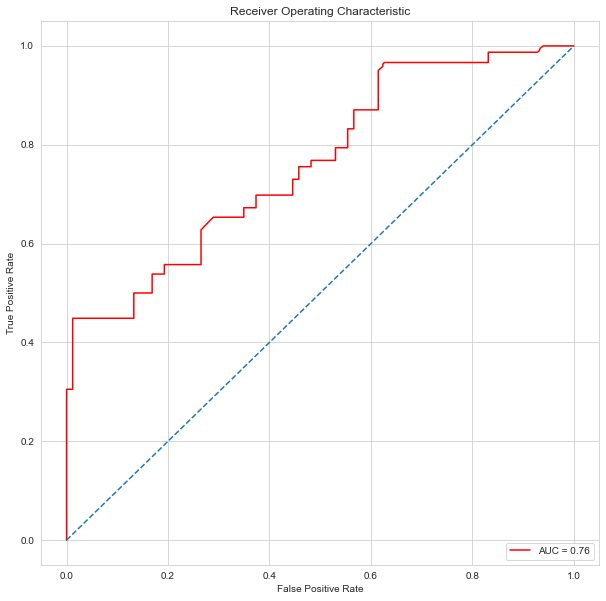

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#https://www.kaggle.com/nirajvermafcb/comparing-various-ml-models-roc-curve-comparison


The ROC curve for the model shows the model has skill in classification. Although I would be hesistant as there is an imbalance in the distribution for each class. There are 626 positive classes in the dataset as opposed to 332 negative. Thus the ROC curve may be presenting an overly optimistic view of the algorithim's performance


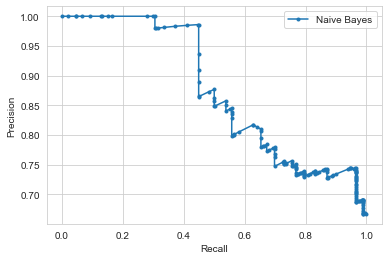

In [30]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(positive, prob)
plt.plot(recall, precision, marker='.', label='Naive Bayes')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [31]:
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.8738771163105218


In [32]:
dataset_1 = xo_encoded.loc[:, ["middle-middle-square_x","middle-middle-square_b","middle-middle-square_o"]]
dataset_3 = xo_encoded.loc[:, ["middle-middle-square_x","middle-middle-square_b","middle-middle-square_o","bottom-right-square_b","bottom-right-square_o","bottom-right-square_x","middle-right-square_b","middle-right-square_x", "middle-right-square_o" ]]
dataset_5 = xo_encoded.loc[:, ["middle-middle-square_x","middle-middle-square_b","middle-middle-square_o","bottom-right-square_b","bottom-right-square_o","bottom-right-square_x","middle-right-square_b","middle-right-square_x", "middle-right-square_o", "top-middle-square_o","top-middle-square_b", "top-middle-square_x","middle-left-square_x", "middle-left-square_b", "middle-left-square_o"]]
dataset_8 = xo_encoded.loc[:, ["bottom-right-square_b","bottom-right-square_o","bottom-right-square_x","top_left_square_b","top_left_square_o", "top_left_square_x","bottom-right-square_b", "bottom-right-square_o", "bottom-right-square_x", "top-right-square_x", "top-right-square_b", "top-right-square_o","top-middle-square_o","top-middle-square_b", "top-middle-square_x", "middle-left-square_x", "middle-left-square_b", "middle-left-square_o", "middle-right-square_x", "middle-right-square_b", "middle-right-square_o", "middle-middle-square_x","middle-middle-square_b","middle-middle-square_o"]]

#https://stackoverflow.com/questions/45035929/creating-new-pandas-dataframe-from-certain-columns-of-existing-dataframe

In [33]:
from sklearn.metrics import plot_roc_curve

clf = GaussianNB()

def getEvaluation(df_param, target) :
    model = clf.fit(df_param, target)
    pred = model.predict(df_param)
    print(pd.crosstab(target, pred, rownames=['True'], colnames=['Predicted'], margins=True))
    print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(target, pred)}\n")
    plot_roc_curve(model,df_param, target)
    plt.plot([0,1],[0,1], 'r--')
    plt.show
    print()

Predicted  False  True  All
True                       
False        192   140  332
True         148   478  626
All          340   618  958
Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

       False       0.56      0.58      0.57       332
        True       0.77      0.76      0.77       626

    accuracy                           0.70       958
   macro avg       0.67      0.67      0.67       958
weighted avg       0.70      0.70      0.70       958





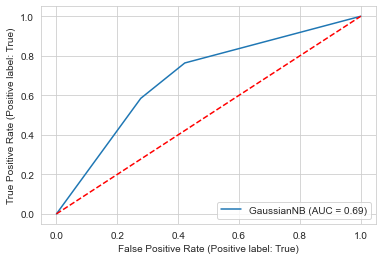

In [34]:
getEvaluation(dataset_1, positive.values.ravel()) 

Predicted  False  True  All
True                       
False        192   140  332
True         148   478  626
All          340   618  958
Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

       False       0.56      0.58      0.57       332
        True       0.77      0.76      0.77       626

    accuracy                           0.70       958
   macro avg       0.67      0.67      0.67       958
weighted avg       0.70      0.70      0.70       958





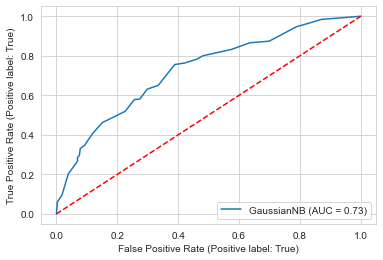

In [35]:
getEvaluation(dataset_3, positive.values.ravel())

Predicted  False  True  All
True                       
False        188   144  332
True         149   477  626
All          337   621  958
Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

       False       0.56      0.57      0.56       332
        True       0.77      0.76      0.77       626

    accuracy                           0.69       958
   macro avg       0.66      0.66      0.66       958
weighted avg       0.70      0.69      0.69       958





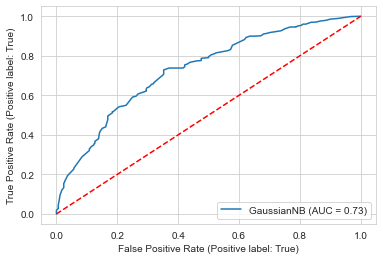

In [36]:
getEvaluation(dataset_5, positive.values.ravel())

Predicted  False  True  All
True                       
False        172   160  332
True         144   482  626
All          316   642  958
Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

       False       0.54      0.52      0.53       332
        True       0.75      0.77      0.76       626

    accuracy                           0.68       958
   macro avg       0.65      0.64      0.65       958
weighted avg       0.68      0.68      0.68       958





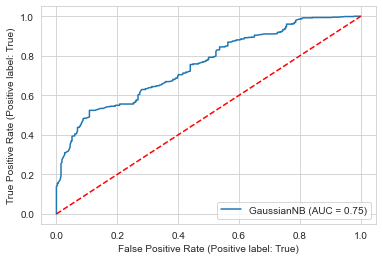

In [37]:
getEvaluation(dataset_8, positive.values.ravel())

From my analysis, it is clear that the more features that are provided to the algorithim the more confident it is in classifying the outcome for player x. There are no features which distract or confuse. This makes sense as the more of the board configuration that is oberseved for a human, the more confident one is determining the outcome of the game.

# Clustering

In [38]:
from sklearn.cluster import KMeans

C:\Users\joshy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


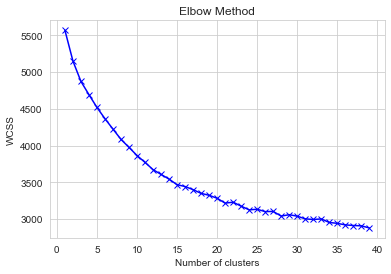

In [39]:
kmeans_per_k = [KMeans(n_clusters=i, init='k-means++', random_state=0).fit(xo_encoded)
                for i in range(1,40)]

inertias = [model.inertia_ for model in kmeans_per_k]
    
plt.plot(range(1, 40), inertias, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

#https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/

In [40]:
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=0)
pred_y = kmeans.fit_predict(xo_encoded)

WCSS (Within-Cluster-Sum-of-Squares) is defined as the sum of the squared distance between each member of the cluster and its centroid.

**Silhouette Method**

This method measure the distance from points in one cluster to the other clusters.

In [41]:
from sklearn.metrics import silhouette_score

silhouette_score(xo_encoded, kmeans.labels_)

0.10676976102536169

In [42]:
silhouette_scores = [silhouette_score(xo_encoded, model.labels_)
                     for model in kmeans_per_k[1:]]

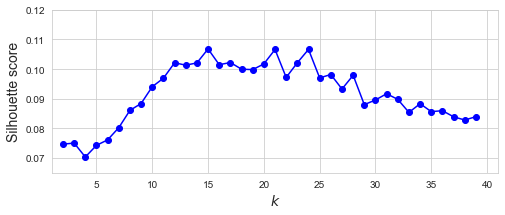

In [43]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 40), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1, 41, 0.065, 0.12])
plt.show()

In [44]:
pd.DataFrame(kmeans.labels_, index=xo.Class, columns=['Cluster ID']).head(-10)

#http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial8/tutorial8.html

,Cluster ID
Class,
positive,10
positive,11
positive,11
positive,11
positive,11
...,...
negative,12
negative,9
negative,4


In [45]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids,columns=xo_encoded.columns)

,top_left_square_b,top_left_square_o,top_left_square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,middle-left-square_b,...,middle-right-square_x,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x
0,1.942890e-16,-2.220446e-16,1.000000,3.333333e-01,5.000000e-01,1.666667e-01,3.333333e-01,5.000000e-01,0.166667,3.333333e-01,...,1.666667e-01,3.333333e-01,5.000000e-01,0.166667,0.333333,5.000000e-01,1.666667e-01,1.942890e-16,-2.220446e-16,1.000000e+00
1,3.733333e-01,4.933333e-01,0.133333,3.733333e-01,4.666667e-01,1.600000e-01,3.733333e-01,4.800000e-01,0.146667,-5.551115e-17,...,1.000000e+00,3.733333e-01,4.933333e-01,0.133333,0.373333,4.666667e-01,1.600000e-01,3.733333e-01,4.800000e-01,1.466667e-01
2,1.029412e-01,8.529412e-01,0.044118,1.764706e-01,4.411765e-02,7.794118e-01,3.970588e-01,1.911765e-01,0.411765,1.029412e-01,...,4.117647e-01,1.029412e-01,8.382353e-01,0.058824,0.176471,7.352941e-02,7.500000e-01,3.970588e-01,1.764706e-01,4.264706e-01
3,3.333333e-01,8.333333e-02,0.583333,0.000000e+00,1.000000e+00,-1.110223e-16,3.333333e-01,8.333333e-02,0.583333,3.333333e-01,...,5.833333e-01,3.333333e-01,8.333333e-02,0.583333,0.000000,1.000000e+00,-1.110223e-16,3.333333e-01,8.333333e-02,5.833333e-01
4,3.076923e-01,7.692308e-02,0.615385,3.076923e-01,1.282051e-01,5.641026e-01,3.076923e-01,1.025641e-01,0.589744,3.076923e-01,...,5.897436e-01,2.775558e-17,9.743590e-01,0.025641,0.000000,9.487179e-01,5.128205e-02,2.775558e-17,1.000000e+00,1.110223e-16
5,3.370787e-01,5.056180e-01,0.157303,3.370787e-01,4.943820e-01,1.685393e-01,1.110223e-16,0.000000e+00,1.000000,3.370787e-01,...,1.685393e-01,1.110223e-16,0.000000e+00,1.000000,0.337079,4.943820e-01,1.685393e-01,3.370787e-01,5.056180e-01,1.573034e-01
6,4.285714e-01,2.571429e-01,0.314286,8.571429e-02,4.285714e-02,8.714286e-01,1.857143e-01,7.571429e-01,0.057143,4.285714e-01,...,7.142857e-02,4.285714e-01,2.571429e-01,0.314286,0.085714,4.285714e-02,8.714286e-01,1.857143e-01,7.571429e-01,5.714286e-02
7,3.243243e-01,1.081081e-01,0.567568,3.243243e-01,8.108108e-02,5.945946e-01,3.243243e-01,8.108108e-02,0.594595,0.000000e+00,...,-1.110223e-16,3.243243e-01,8.108108e-02,0.594595,0.324324,1.081081e-01,5.675676e-01,3.243243e-01,8.108108e-02,5.945946e-01
8,3.733333e-01,4.800000e-01,0.146667,3.733333e-01,4.666667e-01,1.600000e-01,3.733333e-01,4.933333e-01,0.133333,3.733333e-01,...,1.466667e-01,8.326673e-17,5.551115e-17,1.000000,0.000000,5.551115e-17,1.000000e+00,8.326673e-17,5.551115e-17,1.000000e+00
9,2.777778e-01,1.296296e-01,0.592593,2.777778e-01,1.111111e-01,6.111111e-01,1.110223e-16,9.629630e-01,0.037037,2.777778e-01,...,5.925926e-01,1.110223e-16,9.629630e-01,0.037037,0.277778,1.296296e-01,5.925926e-01,2.777778e-01,9.259259e-02,6.296296e-01


<AxesSubplot:xlabel='component1', ylabel='component2'>

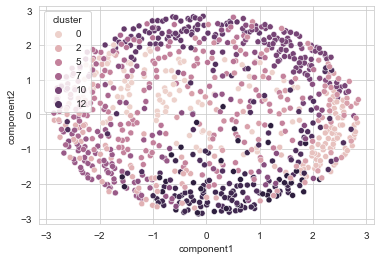

In [46]:
from sklearn.manifold import MDS
import seaborn as sns

embedding = MDS(n_components=2)
mds = pd.DataFrame(embedding.fit_transform(xo_encoded),
             columns = ['component1','component2'])
mds['cluster'] = kmeans.predict(xo_encoded)

sns.scatterplot(data=mds,x = "component1",y="component2",hue="cluster")

#https://stackoverflow.com/questions/67502519/plot-kmeans-clustering-on-more-than-2-dimensional-data

In [47]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(xo_encoded)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.09074355 0.08697261]
Cumulative variance explained by 2 principal components: 17.77%


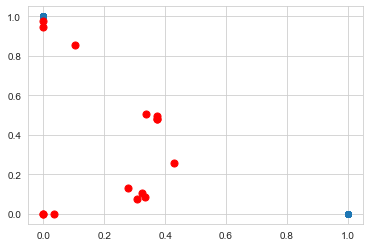

In [48]:
plt.scatter(x = xo_encoded['top_left_square_b'], y = xo_encoded['top_left_square_x'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()

Soft Clustering for the dataset

In [49]:
kmeans.transform(xo_encoded)

array([[3.        , 3.05109088, 3.23656392, ..., 2.32282466, 3.03367764,
        3.35221477],
       [3.        , 3.03356043, 2.7501966 , ..., 2.30652178, 3.02487465,
        3.35221477],
       [2.51661148, 3.04233828, 2.90112435, ..., 2.89424368, 2.55666449,
        3.35221477],
       ...,
       [3.        , 2.56693505, 2.89096852, ..., 2.35509189, 2.55666449,
        2.36565387],
       [2.51661148, 2.56693505, 2.3083083 , ..., 2.90725269, 2.57744059,
        2.34387587],
       [2.51661148, 2.55652542, 2.33365256, ..., 2.90725269, 2.57744059,
        2.32189363]])

From the analysis and experimentation, categorical data is not suited to the KMeans algorithim. KMeans uses mathematical measures to cluster **continuous data** but for categorical data, it is impossible to calculate the distance. The sample space for categorical data is discrete, and doesn't have a natural origin. A Euclidean, or Manhattan, distance function on such a space isn't really meaningful. What is the 'distance' between x, b, and o?

An alternative which I found while researching the issue is the KModes algorithim which uses dissimilarities between data points. The fewer the dissimilarities, the more similar our data points are, hence the name KModes.

https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

In [50]:
from kmodes.kmodes import KModes

In [51]:
xo_kmodes = xo.drop(columns = ["Class"]).copy()

In [52]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(xo_kmodes)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 358, cost: 3878.0
Run 1, iteration: 2/100, moves: 49, cost: 3878.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 173, cost: 4035.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 239, cost: 3863.0
Run 3, iteration: 2/100, moves: 134, cost: 3863.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 250, cost: 3854.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 263, cost: 3938.0
Run 5, iteration: 2/100, moves: 7, cost: 3938.0
Best run was number 4


In [53]:
xo_kmodes['cluster'] = list(clusters)

#https://gist.github.com/satkr7/0422efe2e78e0dbd12bde0b134ebd587#file-kprototypes-ipynb

In [54]:
xo_kmodes[xo_kmodes['cluster']==0].head()

,top_left_square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,cluster
0,x,x,x,x,o,o,x,o,o,0
1,x,x,x,x,o,o,o,x,o,0
2,x,x,x,x,o,o,o,o,x,0
3,x,x,x,x,o,o,o,b,b,0
4,x,x,x,x,o,o,b,o,b,0


In [55]:
xo_kmodes = xo_kmodes.drop(columns = ['cluster'])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 68, cost: 4153.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 75, cost: 3963.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 60, cost: 3760.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 68, cost: 3587.0


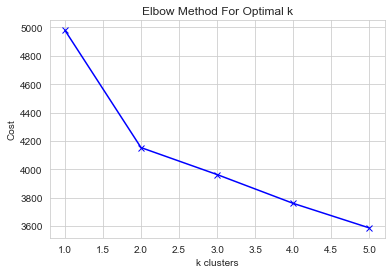

In [56]:
cost = []

K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(xo_kmodes)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [57]:
km = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
cluster_labels = km.fit_predict(xo_kmodes)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 201, cost: 4288.0
Run 1, iteration: 2/100, moves: 98, cost: 4226.0
Run 1, iteration: 3/100, moves: 46, cost: 4226.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 204, cost: 4247.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 111, cost: 4316.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 278, cost: 4237.0
Run 4, iteration: 2/100, moves: 6, cost: 4237.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 214, cost: 4189.0
Run 5, iteration: 2/100, moves: 11, cost: 4189.0
Best run was number 5


In [58]:
xo_kmodes['cluster'] = cluster_labels

<ipython-input-59-4e396e0852a2>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


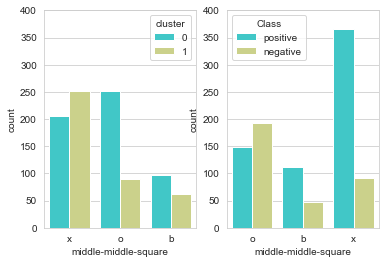

In [59]:
fig, ax =plt.subplots(1,2)
sns.set_style('whitegrid')
sns.countplot(x='middle-middle-square', order=xo_kmodes['middle-middle-square'].value_counts().index, hue='cluster',data=xo_kmodes,palette='rainbow', ax=ax[0]).set_ylim(0,400)
sns.countplot(x='middle-middle-square',hue='Class',data=xo, palette='rainbow',ax=ax[1]).set_ylim(0,400)
fig.show()

In [60]:
#xo_kmodes = xo_kmodes.drop('cluster', axis=1)
# Create an index for cluster interpretation
index = ['0','1']
# Create the data frame
pd.DataFrame(km.cluster_centroids_, columns = xo_kmodes.drop('cluster', axis=1).columns, index = index)

,top_left_square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
0,x,o,o,x,o,x,x,o,x
1,o,x,x,o,x,o,x,x,o


# Dataset Split

In [61]:
from sklearn.model_selection import train_test_split

dict = {'Class':{'positive':1,'negative':0}}
xo.replace(dict,inplace = True)           # replace = str to numerical
x = xo_encoded
y = xo.loc[:,'Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3)

#https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

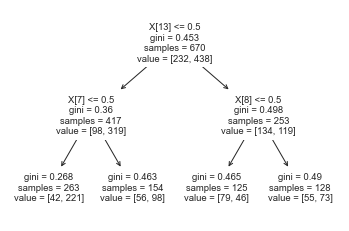

In [63]:
plot_tree(tree_clf);

In [64]:
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

Confusion Matrix Report for classifier DecisionTreeClassifier(max_depth=2, random_state=42):
Predicted   0    1  All
True                   
0          32   68  100
1          15  173  188
All        47  241  288

Classification report for classifier DecisionTreeClassifier(max_depth=2, random_state=42):
              precision    recall  f1-score   support

           0       0.68      0.32      0.44       100
           1       0.72      0.92      0.81       188

    accuracy                           0.71       288
   macro avg       0.70      0.62      0.62       288
weighted avg       0.70      0.71      0.68       288




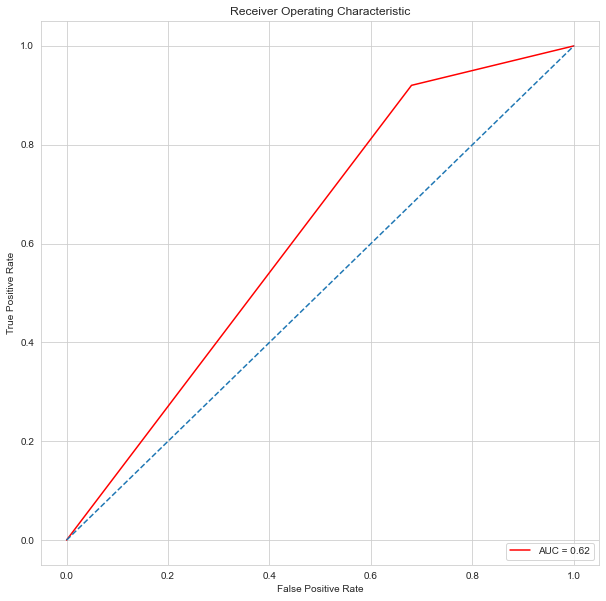

In [65]:
def getEvaluation(model, target, prediction) :
    print(f"Confusion Matrix Report for classifier {model}:\n"
        f"{pd.crosstab(target, prediction, rownames=['True'], colnames=['Predicted'], margins=True)}\n")
    print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(target, prediction)}\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target, prediction)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
split = getEvaluation(tree_clf, y_test.values.ravel(), y_test_pred)

# 1 = positive, 0 = negative

The decision tree algorithim scores very similar to the Naive Bayes classifier. It is difficult to confirm if it is intelligently classifying instances or simply guessing as it is a biased dataset. Further testing and hyperparameter parameter configuration is required.

In [66]:
scores = cross_val_score(tree_clf, x, y, cv=10, scoring="accuracy")
scores

array([0.51041667, 0.63541667, 0.65625   , 0.60416667, 0.6875    ,
       0.66666667, 0.625     , 0.67708333, 0.65263158, 0.62105263])

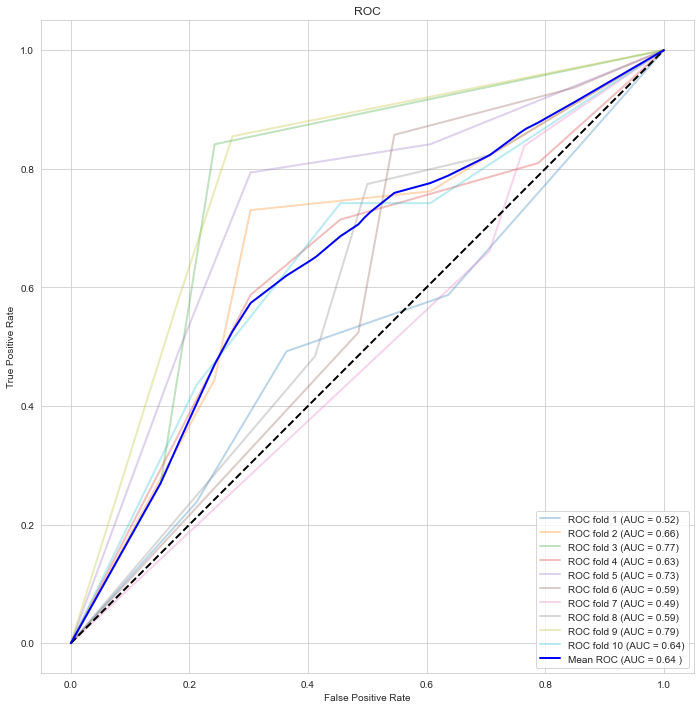

In [67]:
from sklearn.model_selection import StratifiedKFold
from numpy import interp

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = tree_clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


#https://www.kaggle.com/kanncaa1/roc-curve-with-k-fold-cv/

**Tree Classifier Experiments**

In [68]:
from sklearn.metrics import accuracy_score

def decisionTree(model) :
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    experiment = getEvaluation(model, y_test.values.ravel(), y_pred_test)
    print(accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))
    plot_tree(model);
    
#https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/

Confusion Matrix Report for classifier DecisionTreeClassifier(random_state=42):
Predicted    0    1  All
True                    
0           97    3  100
1           11  177  188
All        108  180  288

Classification report for classifier DecisionTreeClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       100
           1       0.98      0.94      0.96       188

    accuracy                           0.95       288
   macro avg       0.94      0.96      0.95       288
weighted avg       0.95      0.95      0.95       288




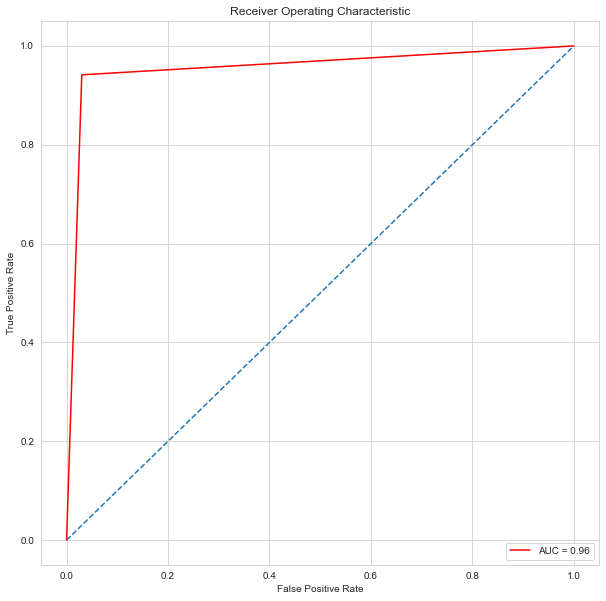

1.0 0.9513888888888888


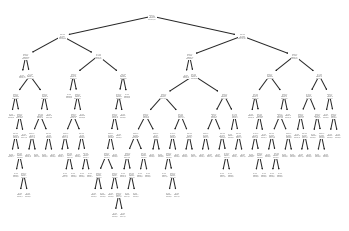

In [69]:
tree_clf_1 = DecisionTreeClassifier(random_state=42) #no maximimun depth provided

decisionTree(tree_clf_1)

In [70]:
path = tree_clf_1.cost_complexity_pruning_path(X_train, y_train)
alphas=path['ccp_alphas']

alphas

array([0.        , 0.0013267 , 0.00139303, 0.00142146, 0.00142469,
       0.00174129, 0.00199005, 0.00199005, 0.0021322 , 0.00238806,
       0.00239872, 0.00253279, 0.00255864, 0.00255864, 0.00261194,
       0.00275545, 0.00278607, 0.0032533 , 0.00355366, 0.00411528,
       0.00426439, 0.00430813, 0.00437673, 0.00522852, 0.00568586,
       0.00593213, 0.00841944, 0.00964517, 0.01613205, 0.01908759,
       0.01950878, 0.04080352])

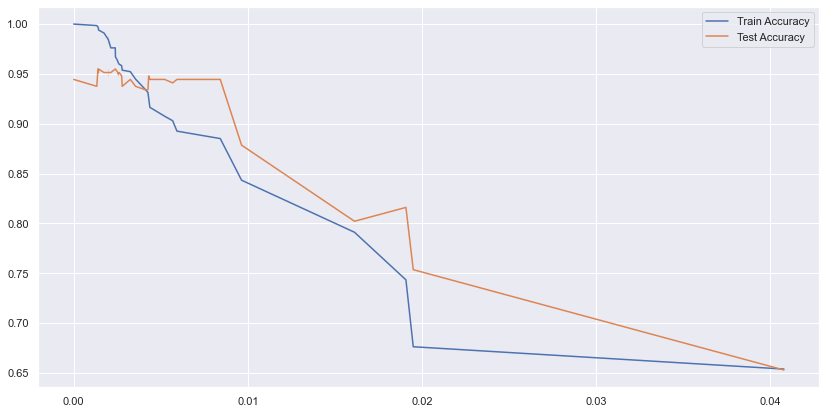

In [71]:
accuracy_train,accuracy_test=[],[]

for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
   
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.05,0.01))
plt.show()

From the above plot, we can see that between alpha=0.008 and 0.015, we get the maximum *test* accuracy.

Confusion Matrix Report for classifier DecisionTreeClassifier(ccp_alpha=0.008, random_state=42):
Predicted   0    1  All
True                   
0          85   15  100
1           1  187  188
All        86  202  288

Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.008, random_state=42):
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       100
           1       0.93      0.99      0.96       188

    accuracy                           0.94       288
   macro avg       0.96      0.92      0.94       288
weighted avg       0.95      0.94      0.94       288




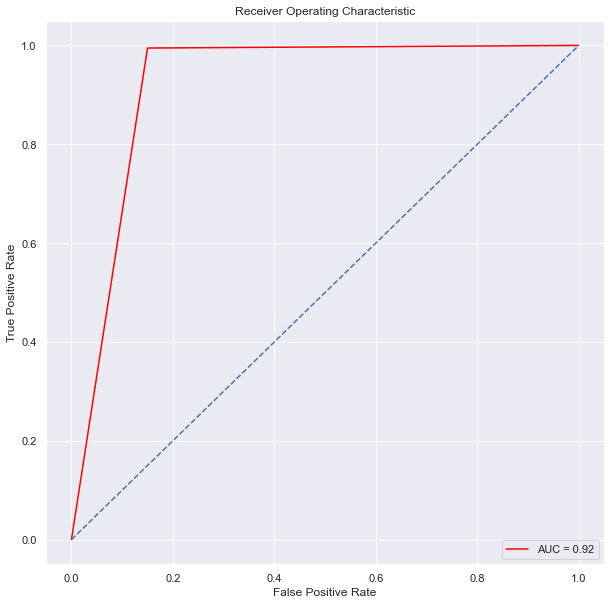

0.8925373134328358 0.9444444444444444


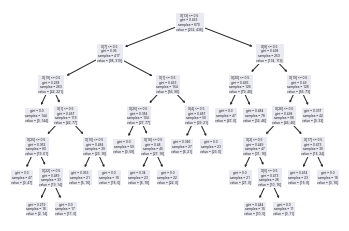

In [72]:
#no maximimun depth provided but tree is pruned based on the above analysis

tree_clf_2 = DecisionTreeClassifier(ccp_alpha=0.008, random_state=42) 

decisionTree(tree_clf_2)

 Although our train accuracy has decreased, our model is now more generalized and it will perform better on unseen data.

Confusion Matrix Report for classifier DecisionTreeClassifier(random_state=42, splitter='random'):
Predicted    0    1  All
True                    
0           95    5  100
1           11  177  188
All        106  182  288

Classification report for classifier DecisionTreeClassifier(random_state=42, splitter='random'):
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       100
           1       0.97      0.94      0.96       188

    accuracy                           0.94       288
   macro avg       0.93      0.95      0.94       288
weighted avg       0.95      0.94      0.94       288




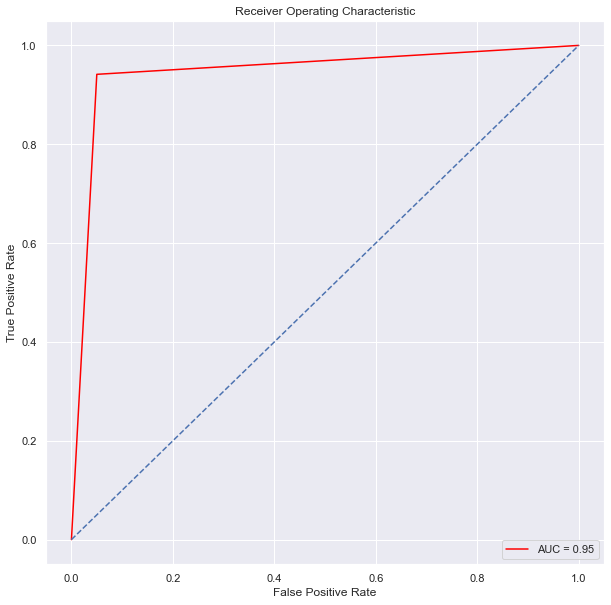

1.0 0.9444444444444444


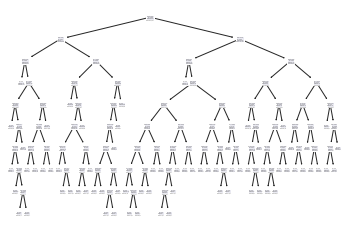

In [73]:
# now testing alternative splitter strategy.
# default is best

tree_clf_3 = DecisionTreeClassifier( random_state=42, splitter = 'random') 

decisionTree(tree_clf_3)

The "random" splitter performs marginally worse than the "best" splitter (only 1 additional FN).

Confusion Matrix Report for classifier DecisionTreeClassifier(min_samples_leaf=5, random_state=42):
Predicted    0    1  All
True                    
0           93    7  100
1           14  174  188
All        107  181  288

Classification report for classifier DecisionTreeClassifier(min_samples_leaf=5, random_state=42):
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       100
           1       0.96      0.93      0.94       188

    accuracy                           0.93       288
   macro avg       0.92      0.93      0.92       288
weighted avg       0.93      0.93      0.93       288




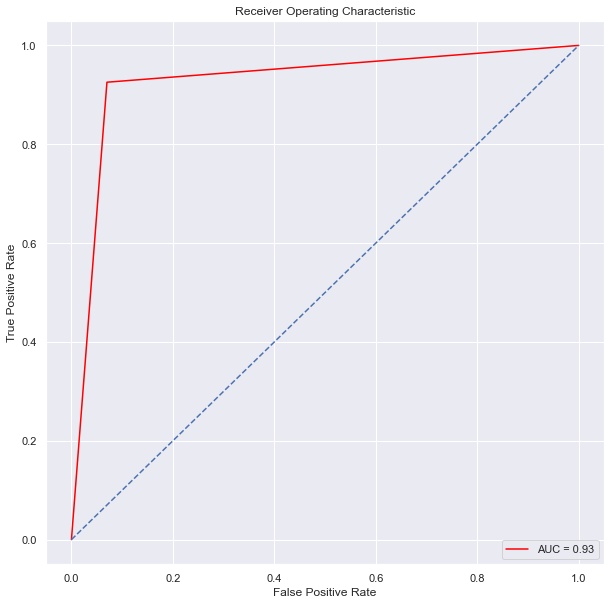

0.9328358208955224 0.9270833333333334


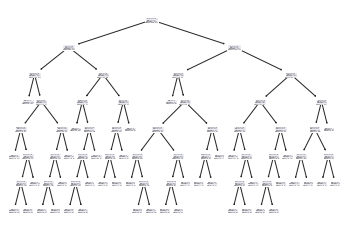

In [74]:
# testing the minimum number of samples required to be at a leaf node
# default is 1

tree_clf_4 = DecisionTreeClassifier(min_samples_leaf = 5, random_state=42, ) 

decisionTree(tree_clf_4)

Confusion Matrix Report for classifier DecisionTreeClassifier(min_samples_leaf=20, random_state=42):
Predicted    0    1  All
True                    
0           84   16  100
1           21  167  188
All        105  183  288

Classification report for classifier DecisionTreeClassifier(min_samples_leaf=20, random_state=42):
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.91      0.89      0.90       188

    accuracy                           0.87       288
   macro avg       0.86      0.86      0.86       288
weighted avg       0.87      0.87      0.87       288




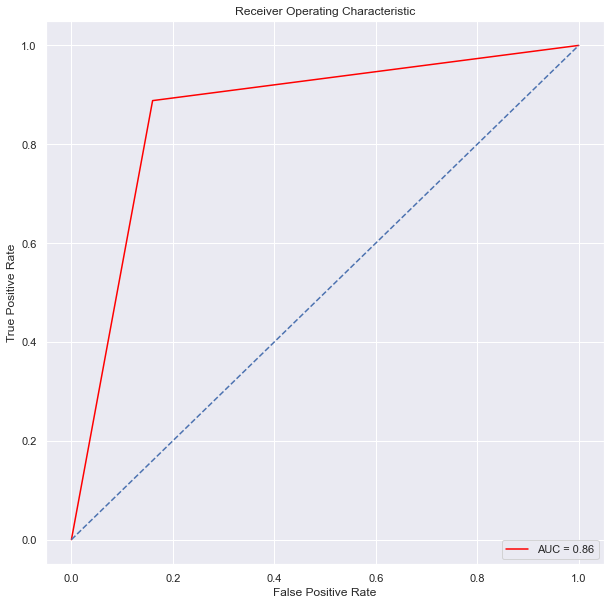

0.8507462686567164 0.8715277777777778


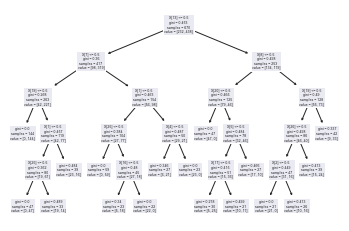

In [75]:
tree_clf_5 = DecisionTreeClassifier(min_samples_leaf = 20, random_state=42, ) 

decisionTree(tree_clf_5)

Confusion Matrix Report for classifier DecisionTreeClassifier(min_samples_leaf=10, random_state=42):
Predicted    0    1  All
True                    
0           94    6  100
1            7  181  188
All        101  187  288

Classification report for classifier DecisionTreeClassifier(min_samples_leaf=10, random_state=42):
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       100
           1       0.97      0.96      0.97       188

    accuracy                           0.95       288
   macro avg       0.95      0.95      0.95       288
weighted avg       0.95      0.95      0.95       288




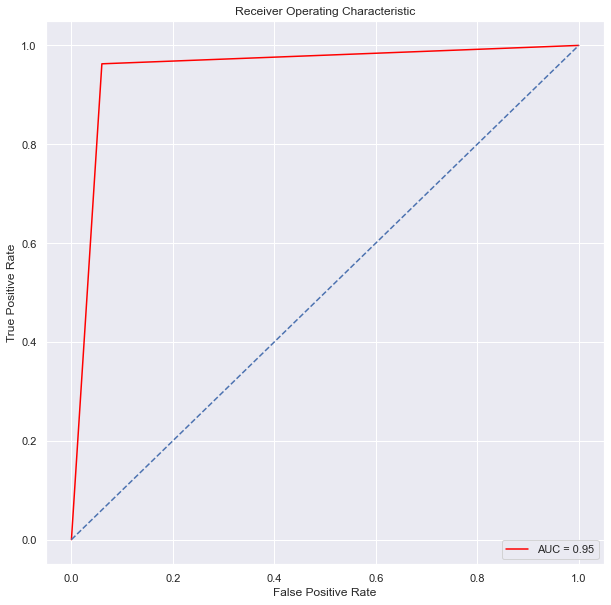

0.9059701492537313 0.9548611111111112


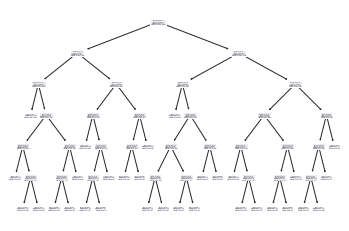

In [76]:
tree_clf_6 = DecisionTreeClassifier(min_samples_leaf = 10, random_state=42, ) 

decisionTree(tree_clf_6)

Confusion Matrix Report for classifier DecisionTreeClassifier(ccp_alpha=0.008, max_depth=6, min_samples_leaf=5,
                       random_state=42):
Predicted   0    1  All
True                   
0          85   15  100
1           1  187  188
All        86  202  288

Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.008, max_depth=6, min_samples_leaf=5,
                       random_state=42):
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       100
           1       0.93      0.99      0.96       188

    accuracy                           0.94       288
   macro avg       0.96      0.92      0.94       288
weighted avg       0.95      0.94      0.94       288




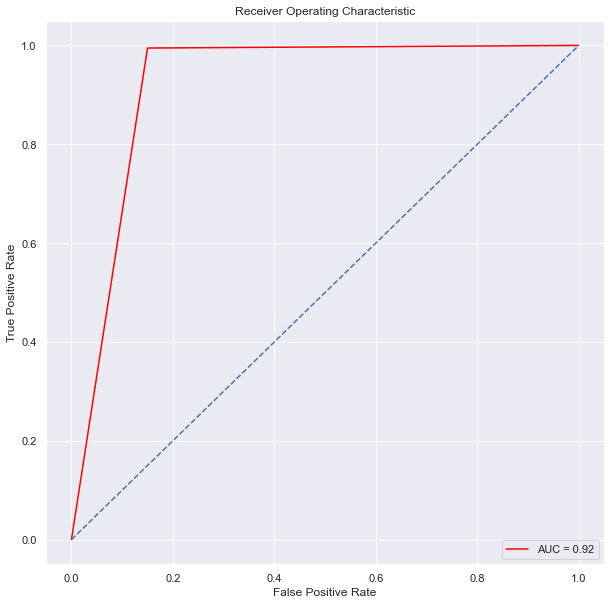

0.8925373134328358 0.9444444444444444


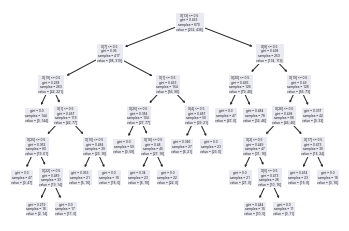

In [77]:
tree_clf_final = DecisionTreeClassifier(ccp_alpha=0.008, min_samples_leaf = 5, random_state=42, max_depth =6) 

decisionTree(tree_clf_final)

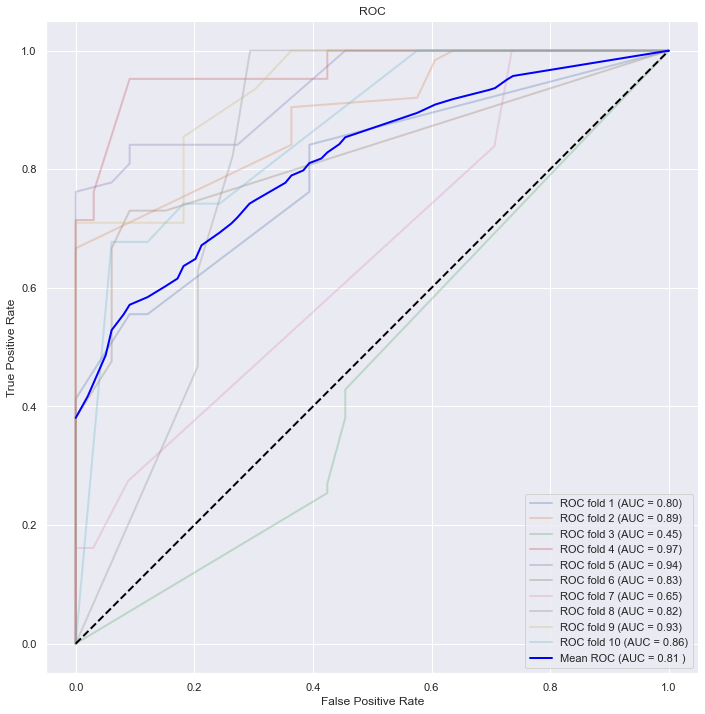

In [78]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = tree_clf_final.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

The hyperparameters of the decision tree do influence the classifier's performance, some more so than others. 

The depth of the tree has a major influence. From my experiments, if the max depth was not set, for this dataset, it would produce a tree of 6 levels. Setting the number of levels to less than six dramatically reduces the accuracy of the classifier.

My analysis of the threshold for pruning the tree showed that the level should be set between 0.008 and 0.015. At this alpha the subtree with the largest cost complexity that is smaller than this figure will be chosen. I have pruned the tree to reduce the impact of overfitting the training set. 

The splitting criteria had neglible influence on the classifier. I expect, due to the few features, that the impact cannot be observed on this dataset.

From my experiments, the number of instances permissable for a leaf should be set to around 5. This parameter becomes ineffective for increasing accuracy with the introduction of pruning (accuracy with and without the parameter holds at train: 0.9149253731343283 test: 0.9305555555555556), although, incrementing the number of instances reduces the accuracy.

In [79]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x, y, stratify=y, test_size=0.6)

Confusion Matrix Report for classifier DecisionTreeClassifier(ccp_alpha=0.008, max_depth=6, min_samples_leaf=5,
                       random_state=42):
Predicted    0    1  All
True                    
0          150   49  199
1           15  361  376
All        165  410  575

Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.008, max_depth=6, min_samples_leaf=5,
                       random_state=42):
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       199
           1       0.88      0.96      0.92       376

    accuracy                           0.89       575
   macro avg       0.89      0.86      0.87       575
weighted avg       0.89      0.89      0.89       575




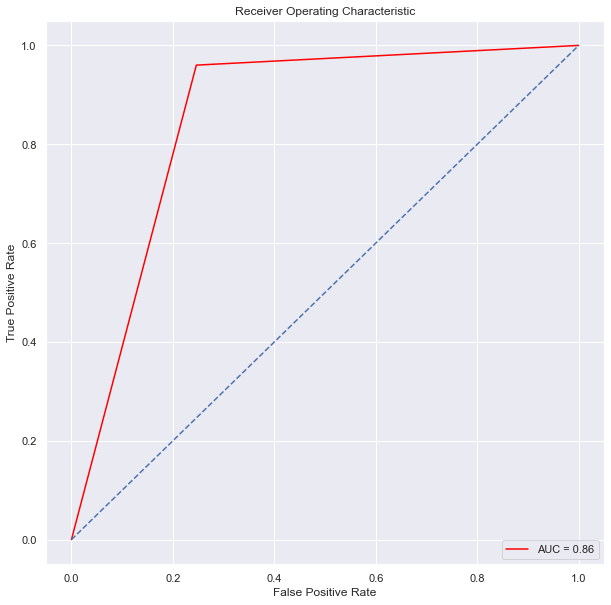

0.9399477806788512 0.888695652173913


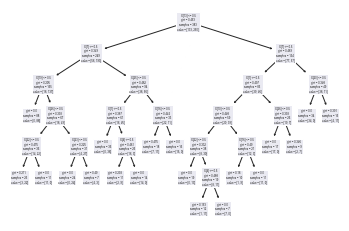

In [80]:
tree_clf_final.fit(X_train_2, y_train_2)
y_pred_test_final = tree_clf_final.predict(X_test_2)
y_pred_train_final = tree_clf_final.predict(X_train_2)
experiment_final = getEvaluation(tree_clf_final, y_test_2.values.ravel(), y_pred_test_final)
print(accuracy_score(y_train_2, y_pred_train_final), accuracy_score(y_test_2, y_pred_test_final))
plot_tree(tree_clf_final);

**Overfitting**

If the decision tree was unconstrained, overfitting would certainly be an issue. As can be seen, it can correctly classify all of the training set and 95% of the test set. When we introduce constraints, such as pruning, the training set accuracy reduces but is more in line with the test set accuracy thus the classifier has been generalised. I am little hesistant to say that the classifier is overfitting the dataset as the test and train scores are very similar in nearly all experiments. 

# Neural Network

In [81]:
from sklearn.utils import shuffle

X = xo_encoded
y = target

X,y = shuffle(X,y)

In [82]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([-1.37872635e+13]),
 array([[ 1.46004281e+12,  1.46004281e+12,  1.46004281e+12,
          3.21468729e+12,  3.21468729e+12,  3.21468729e+12,
          1.72893204e+11,  1.72893204e+11,  1.72893204e+11,
          2.00963218e+12,  2.00963218e+12,  2.00963218e+12,
         -2.58628517e+12, -2.58628517e+12, -2.58628517e+12,
          3.38213594e+12,  3.38213594e+12,  3.38213594e+12,
         -4.83835564e+12, -4.83835564e+12, -4.83835564e+12,
          1.00417340e+13,  1.00417340e+13,  1.00417340e+13,
          9.30778888e+11,  9.30778888e+11,  9.30778888e+11]]))

In [83]:
predictions = lin_reg.predict(X)
predictions

array([[-0.02929688],
       [ 0.95507812],
       [-0.02148438],
       [ 0.03125   ],
       [ 0.91210938],
       [-0.03515625],
       [-0.04101562],
       [ 0.98242188],
       [ 0.98828125],
       [ 0.92578125],
       [-0.02734375],
       [ 0.01953125],
       [-0.02734375],
       [ 0.0390625 ],
       [-0.0234375 ],
       [ 1.0390625 ],
       [ 1.0234375 ],
       [ 1.03515625],
       [-0.046875  ],
       [ 1.01953125],
       [-0.03320312],
       [-0.0234375 ],
       [ 0.91015625],
       [ 0.98242188],
       [ 0.9609375 ],
       [ 0.97460938],
       [ 0.96289062],
       [ 0.97070312],
       [ 0.96484375],
       [ 0.96484375],
       [ 0.98828125],
       [ 0.0234375 ],
       [ 0.91210938],
       [ 0.97265625],
       [ 0.96289062],
       [ 0.97265625],
       [ 0.98046875],
       [ 1.04101562],
       [ 0.96289062],
       [ 0.953125  ],
       [ 1.04296875],
       [ 0.0390625 ],
       [ 0.03125   ],
       [ 0.04101562],
       [ 0.96484375],
       [ 0

In [84]:
y1 = y.values.reshape(-1,1)
predictions = predictions.reshape(-1,1)

In [85]:
df = pd.DataFrame({'Actual': y1.flatten(), 'Predicted': predictions.flatten()})
df

,Actual,Predicted
0,0.0,-0.029297
1,1.0,0.955078
2,0.0,-0.021484
3,0.0,0.031250
4,1.0,0.912109
...,...,...
953,1.0,0.910156
954,1.0,0.898438
955,0.0,0.031250
956,1.0,0.982422


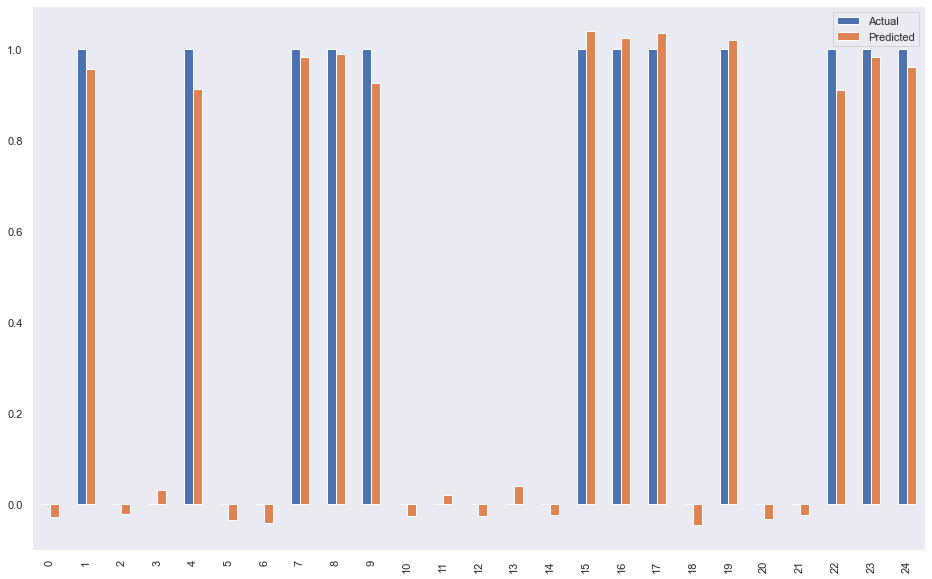

In [86]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

In [87]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y,predictions))

MAE 0.04768438478601253


In [88]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y,predictions))

#https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/

MSE 0.015158894166568126


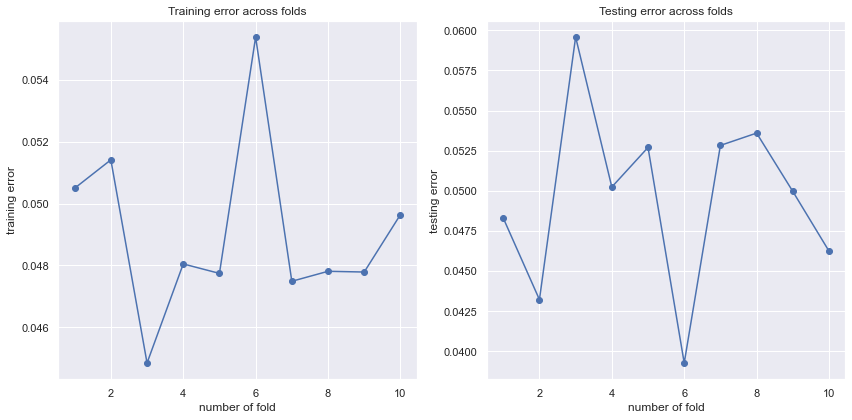

In [89]:
from sklearn.model_selection import KFold

kf = StratifiedKFold(n_splits=10)
list_training_error = []
list_testing_error = []
fig2 = plt.figure(figsize=[12,6])

for train_index, test_index in kf.split(X,y):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   model = LinearRegression()
   model.fit(X_train, y_train)
   y_train_data_pred = model.predict(X_train)
   y_test_data_pred = model.predict(X_test) 

   fold_training_error = mean_absolute_error(y_train, y_train_data_pred)        
   fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
   list_training_error.append(fold_training_error)
   list_testing_error.append(fold_testing_error)

plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

#https://stackoverflow.com/questions/51272258/plot-mean-absolute-error-mae-in-mlpregression-sklearn

The error is very low and similar value for both the 10 KFold split and the full training dataset. This means that the linear regression model can predict on the majority of new, unseen instances. I am confident that this dataset is linearly separable.

In [90]:
X_train_mp, X_test_mp, y_train_mp, y_test_mp = train_test_split(X, y, stratify=y, test_size=0.3)

In [91]:
X_train_mp.shape

(670, 27)

In [92]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Dense(27, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [93]:
from livelossplot import PlotLossesKeras

def mlp(model, epochs) :
    model.fit(X_train_mp, y_train_mp,
          epochs=epochs,
          callbacks=[PlotLossesKeras()],
          verbose=1,
          validation_data=(X_test_mp, y_test_mp))

#https://github.com/stared/livelossplot
#https://www.kdnuggets.com/2018/06/basic-keras-neural-network-sequential-model.html

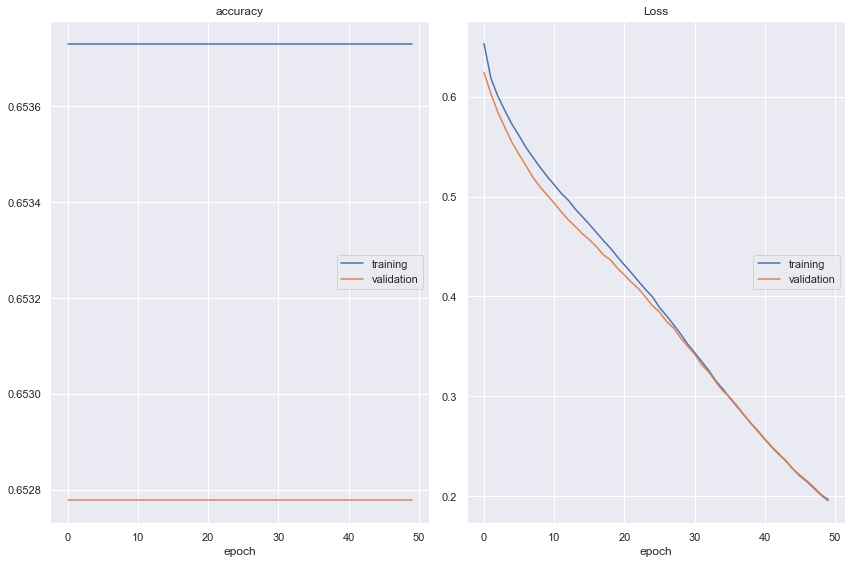

accuracy
	training         	 (min:    0.654, max:    0.654, cur:    0.654)
	validation       	 (min:    0.653, max:    0.653, cur:    0.653)
Loss
	training         	 (min:    0.196, max:    0.653, cur:    0.196)
	validation       	 (min:    0.197, max:    0.624, cur:    0.197)


In [94]:
mlp(model, 50)

In [95]:
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Dense(27, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

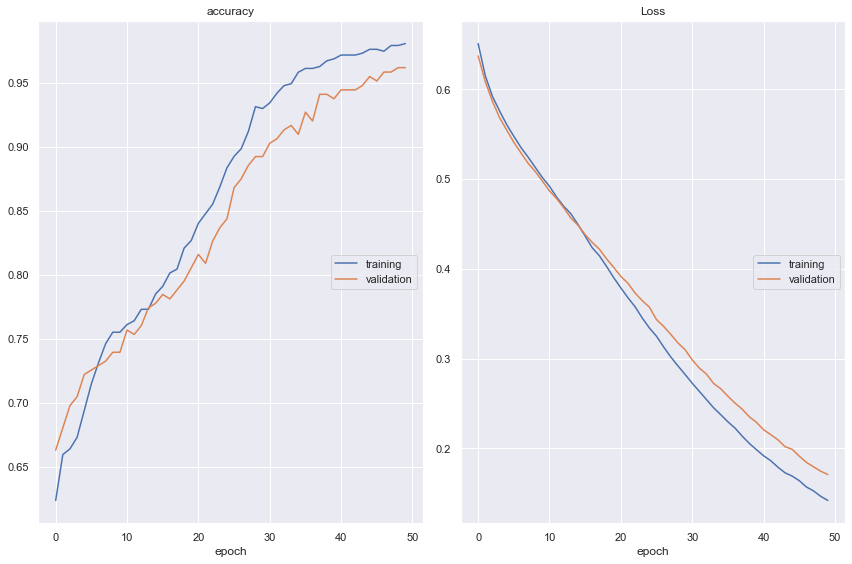

accuracy
	training         	 (min:    0.624, max:    0.981, cur:    0.981)
	validation       	 (min:    0.663, max:    0.962, cur:    0.962)
Loss
	training         	 (min:    0.142, max:    0.651, cur:    0.142)
	validation       	 (min:    0.171, max:    0.637, cur:    0.171)


In [96]:
mlp(model2, 50)

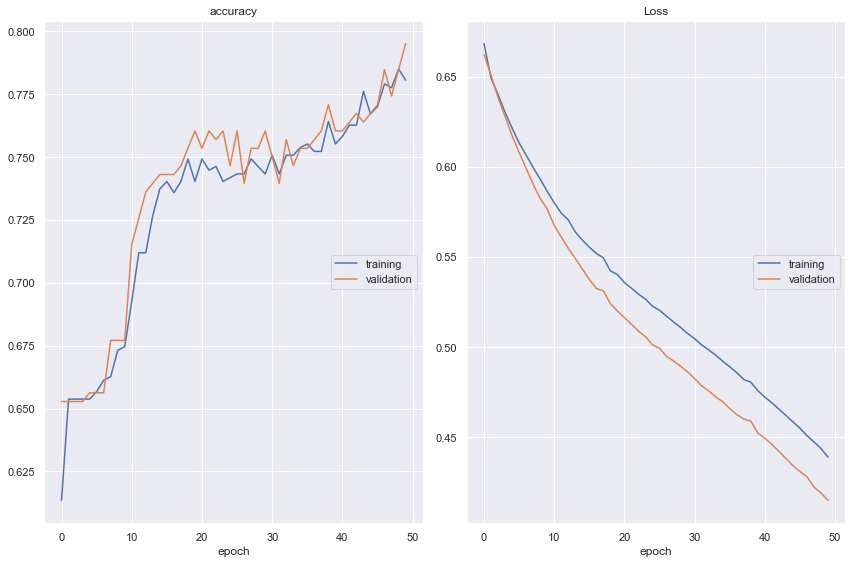

accuracy
	training         	 (min:    0.613, max:    0.785, cur:    0.781)
	validation       	 (min:    0.653, max:    0.795, cur:    0.795)
Loss
	training         	 (min:    0.439, max:    0.669, cur:    0.439)
	validation       	 (min:    0.415, max:    0.662, cur:    0.415)


In [97]:
model3 = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Dense(27, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp(model3, 50)

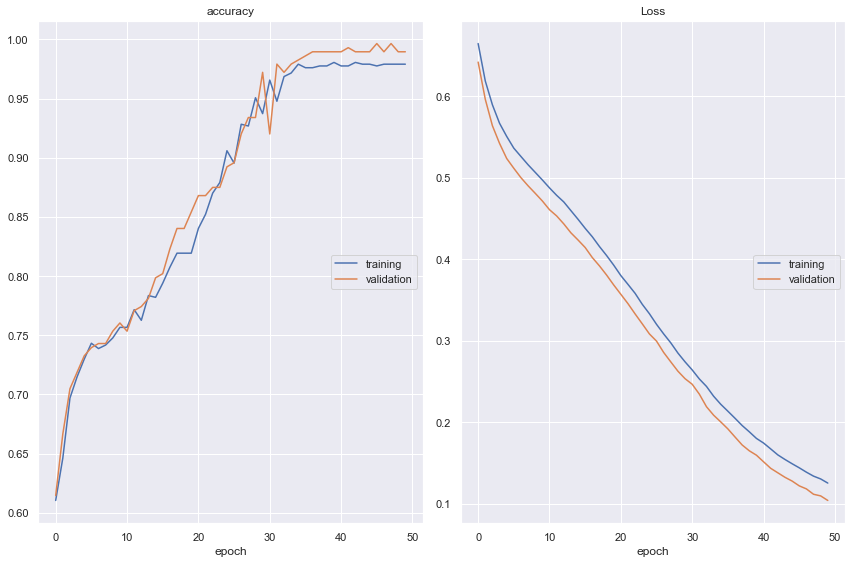

accuracy
	training         	 (min:    0.610, max:    0.981, cur:    0.979)
	validation       	 (min:    0.615, max:    0.997, cur:    0.990)
Loss
	training         	 (min:    0.125, max:    0.665, cur:    0.125)
	validation       	 (min:    0.104, max:    0.642, cur:    0.104)


In [98]:
model4 = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Dense(27, activation='tanh'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp(model4, 50)

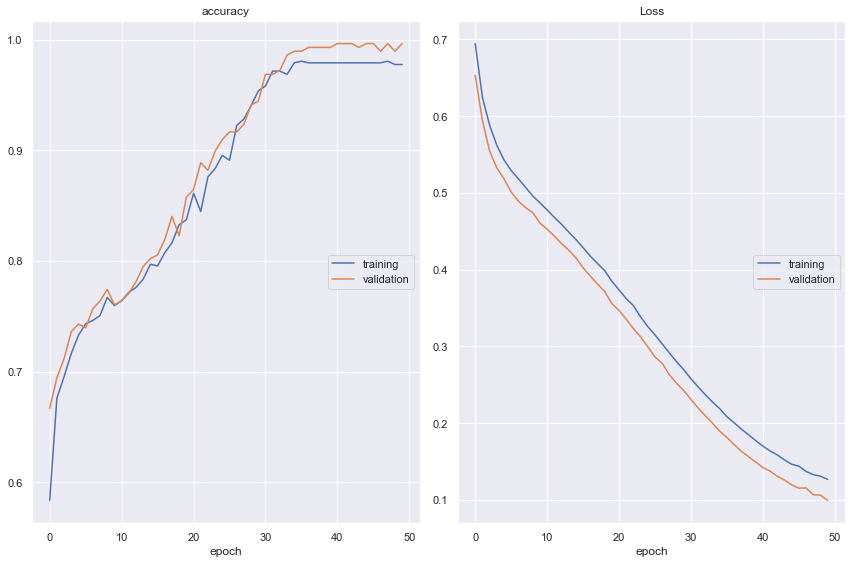

accuracy
	training         	 (min:    0.584, max:    0.981, cur:    0.978)
	validation       	 (min:    0.667, max:    0.997, cur:    0.997)
Loss
	training         	 (min:    0.127, max:    0.695, cur:    0.127)
	validation       	 (min:    0.099, max:    0.653, cur:    0.099)


In [99]:
model5 = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Dense(27, activation='elu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp(model5, 50)

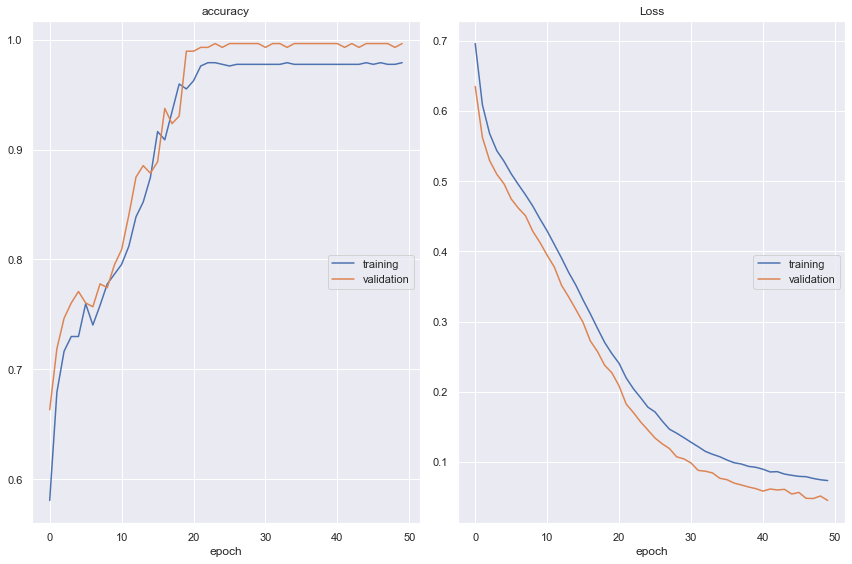

accuracy
	training         	 (min:    0.581, max:    0.979, cur:    0.979)
	validation       	 (min:    0.663, max:    0.997, cur:    0.997)
Loss
	training         	 (min:    0.073, max:    0.696, cur:    0.073)
	validation       	 (min:    0.045, max:    0.635, cur:    0.045)


In [100]:
model6 = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp(model6, 50)

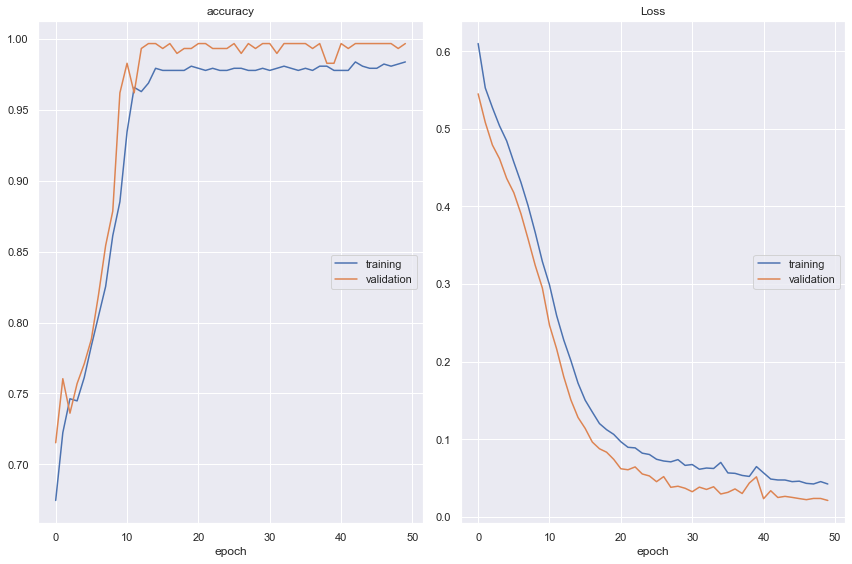

accuracy
	training         	 (min:    0.675, max:    0.984, cur:    0.984)
	validation       	 (min:    0.715, max:    0.997, cur:    0.997)
Loss
	training         	 (min:    0.042, max:    0.610, cur:    0.042)
	validation       	 (min:    0.021, max:    0.545, cur:    0.021)


In [101]:
model7 = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(5, activation='elu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp(model7, 50)

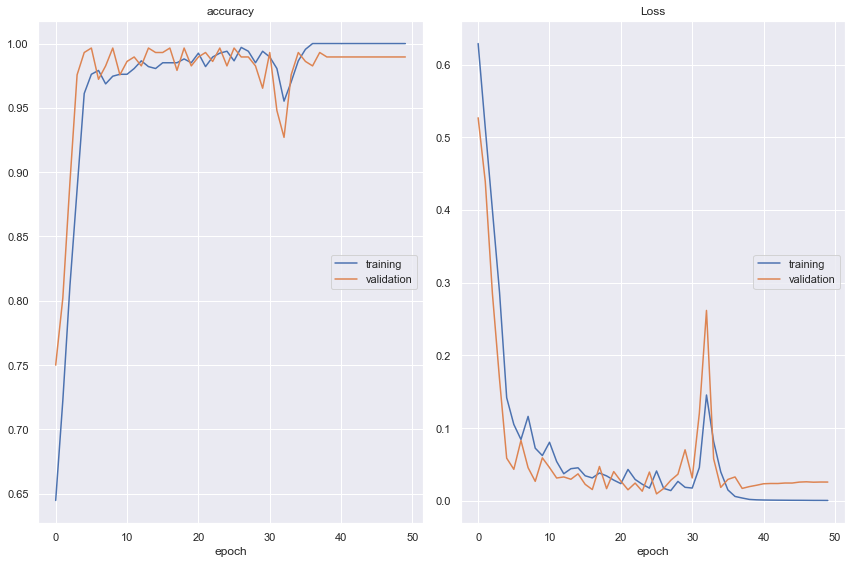

accuracy
	training         	 (min:    0.645, max:    1.000, cur:    1.000)
	validation       	 (min:    0.750, max:    0.997, cur:    0.990)
Loss
	training         	 (min:    0.001, max:    0.629, cur:    0.001)
	validation       	 (min:    0.010, max:    0.527, cur:    0.026)


In [102]:
model8 = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(5, activation='elu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model8.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp(model8, 50)

#https://keras.io/api/optimizers/adam/

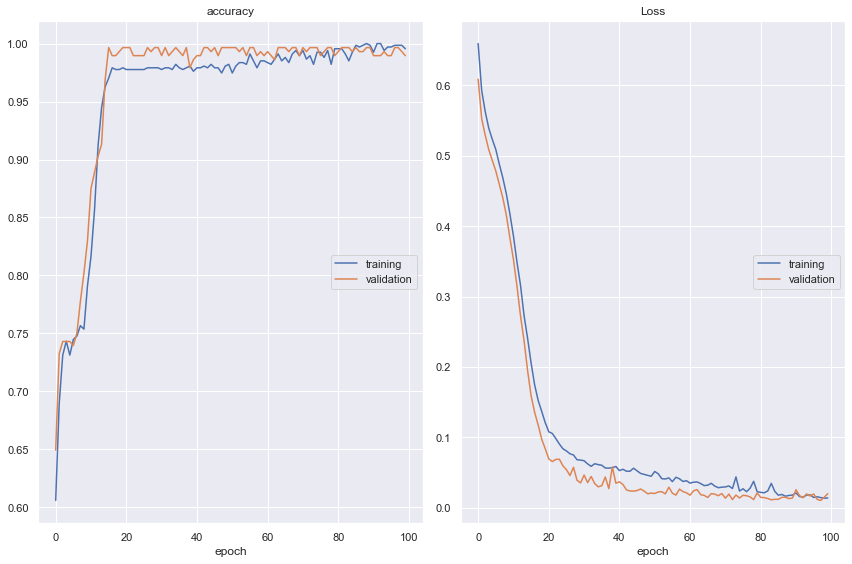

accuracy
	training         	 (min:    0.606, max:    1.000, cur:    0.996)
	validation       	 (min:    0.649, max:    0.997, cur:    0.990)
Loss
	training         	 (min:    0.014, max:    0.659, cur:    0.014)
	validation       	 (min:    0.010, max:    0.609, cur:    0.020)


In [103]:
model9 = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(5, activation='elu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model9.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp(model9, 100)


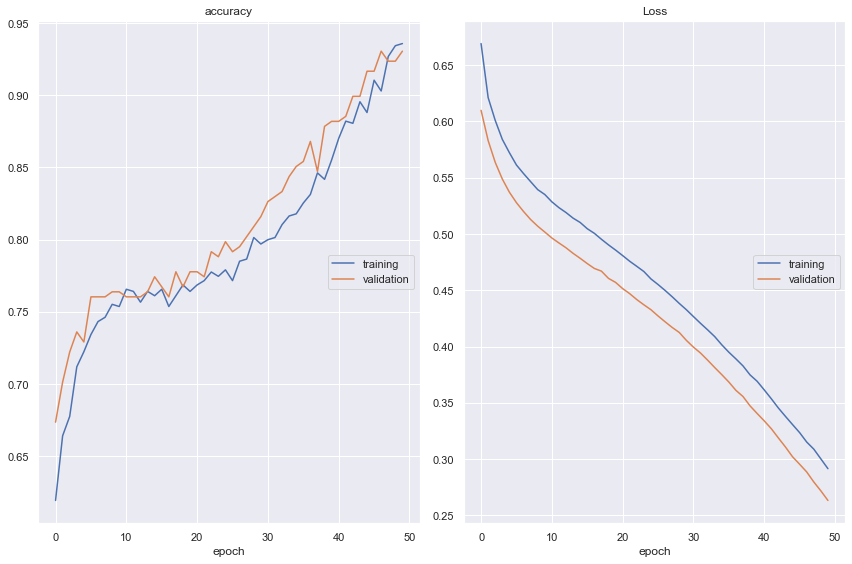

accuracy
	training         	 (min:    0.619, max:    0.936, cur:    0.936)
	validation       	 (min:    0.674, max:    0.931, cur:    0.931)
Loss
	training         	 (min:    0.292, max:    0.669, cur:    0.292)
	validation       	 (min:    0.263, max:    0.610, cur:    0.263)


In [104]:
model10 = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(5, activation='elu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

opt = tf.keras.optimizers.SGD(momentum=0.01)

model10.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp(model10, 50)

#https://faroit.com/keras-docs/2.0.2/optimizers/

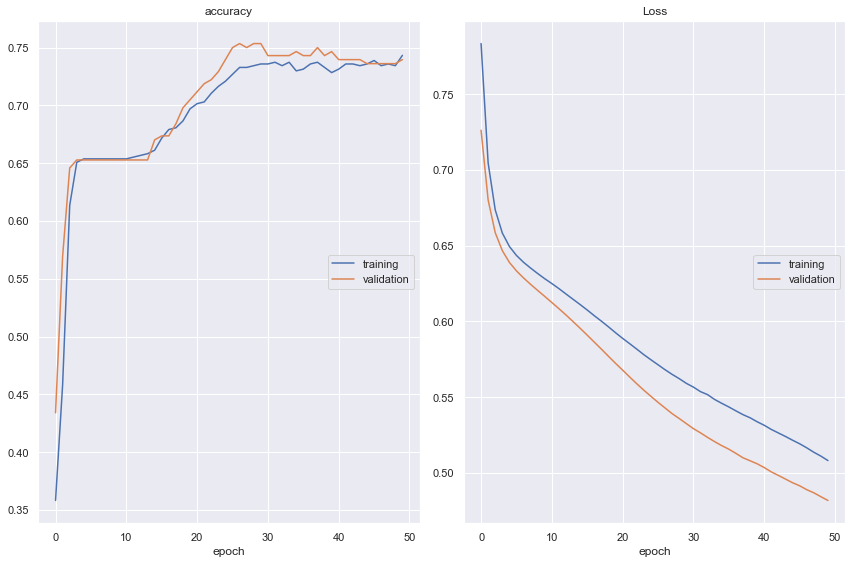

accuracy
	training         	 (min:    0.358, max:    0.743, cur:    0.743)
	validation       	 (min:    0.434, max:    0.753, cur:    0.740)
Loss
	training         	 (min:    0.508, max:    0.783, cur:    0.508)
	validation       	 (min:    0.482, max:    0.726, cur:    0.482)


In [105]:
model11 = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(5, activation='elu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

opt = tf.keras.optimizers.SGD(momentum=0.1)

model11.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp(model11, 50)

In [106]:
class tic_tac_toe_game(object):
    def __init__(self):
        # Create the board 
        self.board=np.full((3,3),2)

    def toss(self):
        """Function to simulate a toss and decide which player goes first

        Args:

        Returns:
        Returns 1 if player assigned mark 1 has won, or 0 if his opponent won

        """
        turn=np.random.randint(0,2,size=1)
        if turn.mean()==0:
            self.turn_monitor=0
        elif turn.mean()==1:
            self.turn_monitor=1
        return self.turn_monitor

    def move(self,player,coord):
        """Function to perform the action of placing a mark on the tic tac toe board
        After performing the action, this function flips the value of the turn_monitor to 
        the next player

        Args:
        player: 1 if player who is assigned the mark 1 is performing the action, 
        0 if his opponent is performing the action
        coord: The coordinate where the 1 or 0 is to be placed on the 
        tic-tac-toe board (numpy array)

        Returns:
        game_status(): Calls the game status function and returns its value
        board: Returns the new board state after making the move

        """
        if self.board[coord]!=2 or self.game_status()!="In Progress" or self.turn_monitor!=player:
            raise ValueError("Invalid move")
        self.board[coord]=playter
        self.turn_monitor=1-player
        return self.game_status(),self.board


    def game_status(self):
        """Function to check the current status of the game, 
        whether the game has been won, drawn or is in progress

        Args:

        Returns:
        "Won" if the game has been won, "Drawn" if the 
        game has been drawn, or "In Progress", if the game is still in progress

        """
        #check for a win along rows
        for i in range(self.board.shape[0]):
            if 2 not in self.board[i,:] and len(set(self.board[i,:]))==1:
                return "Won"
        #check for a win along columns
        for j in range(self.board.shape[1]):
            if 2 not in self.board[:,j] and len(set(self.board[:,j]))==1:
                return "Won"
        # check for a win along diagonals
        if 2 not in np.diag(self.board) and len(set(np.diag(self.board)))==1:
            return "Won"
        if 2 not in np.diag(np.fliplr(self.board)) and len(set(np.diag(np.fliplr(self.board))))==1:
            return "Won"
        # check for a Draw
        if not 2 in self.board:
            return "Drawn"
        else:
            return "In Progress"

In [107]:
def legal_moves_generator(current_board_state,turn_monitor):
    """Function that returns the set of all possible legal moves and resulting board states, 
    for a given input board state and player

    Args:
    current_board_state: The current board state
    turn_monitor: 1 if it's the player who places the mark 1's turn to play, 0 if its his opponent's turn

    Returns:
    legal_moves_dict: A dictionary of a list of possible next coordinate-resulting board state pairs
    The resulting board state is flattened to 1 d array

    """
    legal_moves_dict={}
    for i in range(current_board_state.shape[0]):
        for j in range(current_board_state.shape[1]):
            if current_board_state[i,j]==2:
                board_state_copy=current_board_state.copy()
                board_state_copy[i,j]=turn_monitor
                legal_moves_dict[(i,j)]=board_state_copy.flatten()
    return legal_moves_dict

In [108]:
def move_selector(model,current_board_state,turn_monitor):
    """Function that selects the next move to make from a set of possible legal moves

    Args:
    model: The Evaluator function to use to evaluate each possible next board state
    turn_monitor: 1 if it's the player who places the mark 1's turn to play, 0 if its his opponent's turn

    Returns:
    selected_move: The numpy array coordinates where the player should place thier mark
    new_board_state: The flattened new board state resulting from performing above selected move
    score: The score that was assigned to the above selected_move by the Evaluator (model)

    """
    tracker={}
    legal_moves_dict=legal_moves_generator(current_board_state,turn_monitor)
    for legal_move_coord in legal_moves_dict:
        score=model.predict(legal_moves_dict[legal_move_coord].reshape(1,9))
        tracker[legal_move_coord]=score
    selected_move=max(tracker, key=tracker.get)
    new_board_state=legal_moves_dict[selected_move]
    score=tracker[selected_move]
    return selected_move,new_board_state,score

In [109]:
def row_winning_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan rowwise and identify coordinate amongst the legal coordinates that will
    result in a winning board state

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to win for the opponent
    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        #check for a win along rows
        for i in range(current_board_state_copy.shape[0]):
            if 2 not in current_board_state_copy[i,:] and len(set(current_board_state_copy[i,:]))==1:
                selected_move=legal_move_coord
                return selected_move
            
def column_winning_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan column wise and identify coordinate amongst the legal coordinates that will
    result in a winning board state

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move

    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to win for the opponent
    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        for j in range(current_board_state_copy.shape[1]):
                    if 2 not in current_board_state_copy[:,j] and len(set(current_board_state_copy[:,j]))==1:
                        selected_move=legal_move_coord
                        return selected_move

def diag1_winning_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan diagonal and identify coordinate amongst the legal coordinates that will
    result in a winning board state

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move

    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to win for the opponent

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 2 not in np.diag(current_board_state_copy) and len(set(np.diag(current_board_state_copy)))==1:
            selected_move=legal_move_coord
            return selected_move
            
def diag2_winning_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan second diagonal and identify coordinate amongst the legal coordinates that will
    result in a winning board state

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move

    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to win for the opponent

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 2 not in np.diag(np.fliplr(current_board_state_copy)) and len(set(np.diag(np.fliplr(current_board_state_copy))))==1:
            selected_move=legal_move_coord
            return selected_move
            
#------------#

def row_block_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan rowwise and identify coordinate amongst the legal coordinates 
    that will prevent the program 
    from winning

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will block 1 from winning

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        for i in range(current_board_state_copy.shape[0]):
            if 2 not in current_board_state_copy[i,:] and (current_board_state_copy[i,:]==1).sum()==2:
                if not (2 not in current_board_state[i,:] and (current_board_state[i,:]==1).sum()==2):
                    selected_move=legal_move_coord
                    return selected_move
            
def column_block_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan column wise and identify coordinate amongst the legal coordinates that will prevent 1 
    from winning

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will block 1 from winning

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        
        for j in range(current_board_state_copy.shape[1]):
                    if 2 not in current_board_state_copy[:,j] and (current_board_state_copy[:,j]==1).sum()==2:
                        if not (2 not in current_board_state[:,j] and (current_board_state[:,j]==1).sum()==2):
                            selected_move=legal_move_coord
                            return selected_move

def diag1_block_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan diagonal 1 and identify coordinate amongst the legal coordinates that will prevent 1 
    from winning

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will block 1 from winning

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor    
        if 2 not in np.diag(current_board_state_copy) and (np.diag(current_board_state_copy)==1).sum()==2:
                if not (2 not in np.diag(current_board_state) and (np.diag(current_board_state)==1).sum()==2):
                    selected_move=legal_move_coord
                    return selected_move
            
def diag2_block_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan second diagonal wise and identify coordinate amongst the legal coordinates that will
    result in a column having only 0s

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to two 0s being there (and no 1s)

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 2 not in np.diag(np.fliplr(current_board_state_copy)) and (np.diag(np.fliplr(current_board_state_copy))==1).sum()==2:
            if not (2 not in np.diag(np.fliplr(current_board_state)) and (np.diag(np.fliplr(current_board_state))==1).sum()==2):
                selected_move=legal_move_coord
                return selected_move

#---------------#
def row_second_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan rowwise and identify coordinate amongst the legal coordinates that will
    result in a row having two 0s and no 1s

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to two 0s being there (and no 1s)

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        
        for i in range(current_board_state_copy.shape[0]):
            if 1 not in current_board_state_copy[i,:] and (current_board_state_copy[i,:]==0).sum()==2:
                if not (1 not in current_board_state[i,:] and (current_board_state[i,:]==0).sum()==2):
                    selected_move=legal_move_coord
                    return selected_move
            
def column_second_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan column wise and identify coordinate amongst the legal coordinates that will
    result in a column having two 0s and no 1s

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to two 0s being there (and no 1s)

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        
        for j in range(current_board_state_copy.shape[1]):
                    if 1 not in current_board_state_copy[:,j] and (current_board_state_copy[:,j]==0).sum()==2:
                        if not (1 not in current_board_state[:,j] and (current_board_state[:,j]==0).sum()==2):
                            selected_move=legal_move_coord
                            return selected_move

def diag1_second_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan diagonal wise and identify coordinate amongst the legal coordinates that will
    result in a column having two 0s and no 1s

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to two 0s being there (and no 1s)

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 1 not in np.diag(current_board_state_copy) and (np.diag(current_board_state_copy)==0).sum()==2:
            if not (1 not in np.diag(current_board_state) and (np.diag(current_board_state)==0).sum()==2):
                selected_move=legal_move_coord
                return selected_move
            
def diag2_second_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan second diagonal wise and identify coordinate amongst 
    the legal coordinates that will result in a column having two 0s and no 1s

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where opponent places their mark

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 1 not in np.diag(np.fliplr(current_board_state_copy)) and (np.diag(np.fliplr(current_board_state_copy))==0).sum()==2:
            if not (1 not in np.diag(np.fliplr(current_board_state)) and (np.diag(np.fliplr(current_board_state))==0).sum()==2):
                selected_move=legal_move_coord
                return selected_move
    
def opponent_move_selector(current_board_state,turn_monitor,mode):
    """Function that picks a legal move for the opponent

    Args:
    current_board_state: Current board state
    turn_monitor: whose turn it is to move
    mode: whether hard or easy mode

    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to two 0s being there (and no 1s)

    """ 
    legal_moves_dict=legal_moves_generator(current_board_state,turn_monitor)
    
    winning_move_checks=[row_winning_move_check,column_winning_move_check,diag1_winning_move_check,diag2_winning_move_check]
    block_move_checks=[row_block_move_check,column_block_move_check,diag1_block_move_check,diag2_block_move_check]
    second_move_checks=[row_second_move_check,column_second_move_check,diag1_second_move_check,diag2_second_move_check]

    if mode=="Hard":
        random.shuffle(winning_move_checks)
        random.shuffle(block_move_checks)
        random.shuffle(second_move_checks)        
        
        for fn in winning_move_checks:
            if fn(current_board_state,legal_moves_dict,turn_monitor):
                return fn(current_board_state,legal_moves_dict,turn_monitor)
            
        for fn in block_move_checks:
            if fn(current_board_state,legal_moves_dict,turn_monitor):
                return fn(current_board_state,legal_moves_dict,turn_monitor)
            
        for fn in second_move_checks:
            if fn(current_board_state,legal_moves_dict,turn_monitor):
                return fn(current_board_state,legal_moves_dict,turn_monitor)
            
        selected_move=random.choice(list(legal_moves_dict.keys()))
        return selected_move
    
    elif mode=="Easy":
        legal_moves_dict=legal_moves_generator(current_board_state,turn_monitor)
        selected_move=random.choice(list(legal_moves_dict.keys()))
        return selected_move

In [110]:
def train(model,mode,print_progress=False):
    """Function trains the Evaluator (model) by playing a game against an opponent 
    playing random moves, and updates the weights of the model after the game
    
    Note that the model weights are updated using SGD with a batch size of 1

    Args:
    model: The Evaluator function being trained

    Returns:
    model: The model updated using SGD
    y: The corrected scores

    """ 
    # start the game
    if print_progress==True:
        print("___________________________________________________________________")
        print("Starting a new game")
    game=tic_tac_toe_game()
    game.toss()
    scores_list=[]
    corrected_scores_list=[]
    new_board_states_list=[]
    
    while(1):
        if game.game_status()=="In Progress" and game.turn_monitor==1:
            # If its the program's turn, use the Move Selector function to select the next move
            selected_move,new_board_state,score=move_selector(model,game.board,game.turn_monitor)
            scores_list.append(score[0][0])
            new_board_states_list.append(new_board_state)
            # Make the next move
            game_status,board=game.move(game.turn_monitor,selected_move)
            if print_progress==True:
                print("Program's Move")
                print(board)
                print("\n")
        elif game.game_status()=="In Progress" and game.turn_monitor==0:
            selected_move=opponent_move_selector(game.board,game.turn_monitor,mode=mode)
        
            # Make the next move
            game_status,board=game.move(game.turn_monitor,selected_move)
            if print_progress==True:
                print("Opponent's Move")
                print(board)
                print("\n")
        else:
            break

    
    # Correct the scores, assigning 1/0/-1 to the winning/drawn/losing final board state, 
    # and assigning the other previous board states the score of their next board state
    new_board_states_list=tuple(new_board_states_list)
    new_board_states_list=np.vstack(new_board_states_list)
    if game_status=="Won" and (1-game.turn_monitor)==1: 
        corrected_scores_list=shift(scores_list,-1,cval=1.0)
        result="Won"
    if game_status=="Won" and (1-game.turn_monitor)!=1:
        corrected_scores_list=shift(scores_list,-1,cval=-1.0)
        result="Lost"
    if game_status=="Drawn":
        corrected_scores_list=shift(scores_list,-1,cval=0.0)
        result="Drawn"
    if print_progress==True:
        print("Program has ",result)
        print("\n Correcting the Scores and Updating the model weights:")
        print("___________________________________________________________________\n")
        
    x=new_board_states_list
    y=corrected_scores_list
    
    def unison_shuffled_copies(a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]
    
    # shuffle x and y in unison
    x,y=unison_shuffled_copies(x,y)
    x=x.reshape(-1,9) 
    
    # update the weights of the model, one record at a time
    model.fit(x,y,epochs=1,batch_size=1,verbose=0)
    return model,y,result

In [111]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(18, input_dim=9,kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(9, kernel_initializer='normal',activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1,kernel_initializer='normal')
])

learning_rate = 0.001
momentum = 0.8

sgd = tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum,nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.summary()

mlp(model, 50)

C:\Users\joshy\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 18)                180       
_________________________________________________________________
dropout (Dropout)            (None, 18)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 9)                 171       
_________________________________________________________________
dropout_1 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 10        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


ValueError: in user code:

    C:\Users\joshy\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\joshy\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\joshy\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\joshy\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\joshy\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\joshy\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\joshy\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\joshy\AppData\Roaming\Python\Python38\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\joshy\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_11 is incompatible with the layer: expected axis -1 of input shape to have value 9 but received input with shape (None, 27)


In [139]:
def convert() :
    # Create the board 
    board=np.full((3,3),2)
    
    for index, row in xo.iterrows():
        print(index)
        for feature in row :
            if feature == "x" :
                print(feature.column)
  
